In [1]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

In [2]:
df = pd.read_csv('04_06_datos.csv', delimiter=";")

- Local Outlier Factor:
    - Algoritmo de aprendizaje automático no supervisado
    - Detecta anomalías en los datos de observación
    - Mide el puntaje de densidad local de cada muestra y ponder sus puntaje
    - Al comparar el puntaje de la muestra con sus vecinos, define los elementos de menor densidad como anomalías en los datos


- Desafío: Detectar los valores atípicos que nos dan en el archivo datos.csv
    1. Usar la clase LocalOutlierFactor para analizar valores atípicos
    2. Crear una nueva columna en el DataFrame llamada 'local_outlier'
    3. Guardar en la columna anterior el resultado de la predicción (1 normal, -1 atípico)
    4. Mostrar el total de valores atípicos

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

# n_neighbors: El número de vecinos a considerar (valor típico entre 20 y 100)
# contamination: La proporción esperada de outliers en tus datos (ej. 10%)
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

y_pred = lof.fit_predict(X)

df['local_outlier'] = y_pred

print('Total outliers:', len(df[y_pred == -1]))

Total outliers: 42


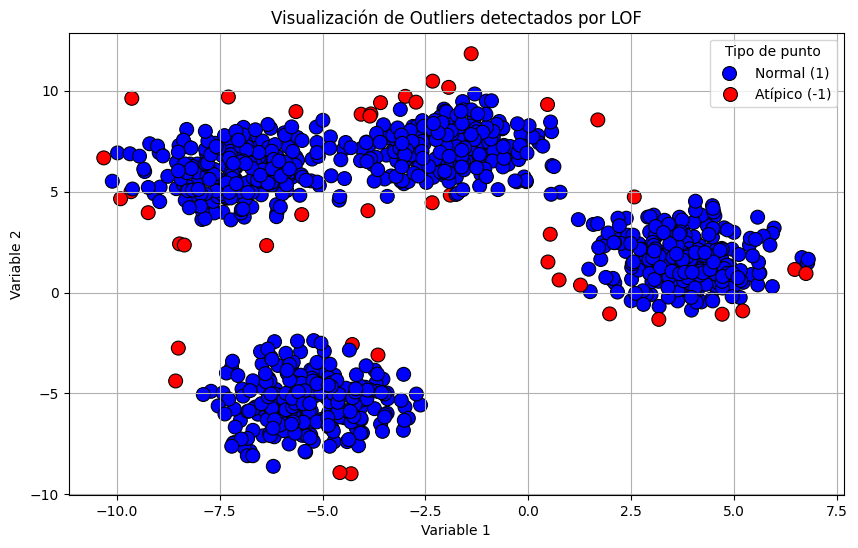

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df, 
    x='Variable1', 
    y='Variable2', 
    hue='local_outlier', 
    palette={-1: 'red', 1: 'blue'}, 
    s=100, 
    edgecolor='k' 
)

plt.title("Visualización de Outliers detectados por LOF")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.legend(title="Tipo de punto", labels=['Normal (1)', 'Atípico (-1)'])
plt.grid(True)
plt.show()